### Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [19]:
dataset = pd.read_csv("Banknote-authentication-dataset-week5.csv")
#columns = {'country','avg_income','happyScore'}
#drop = list(set(dataset.columns) - columns)
#dataset = dataset.drop(drop, axis=1)
dataset.head()

,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [20]:
dataset.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [21]:
scaler = MinMaxScaler() 
dataset_scaled = scaler.fit_transform(dataset) 
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns,index=dataset.index)
dataset_scaled.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.539114,0.587301
std,0.205003,0.219611
min,0.000000,0.000000
25%,0.379977,0.451451
50%,0.543617,0.602168
75%,0.711304,0.770363
max,1.000000,1.000000


### Plotting

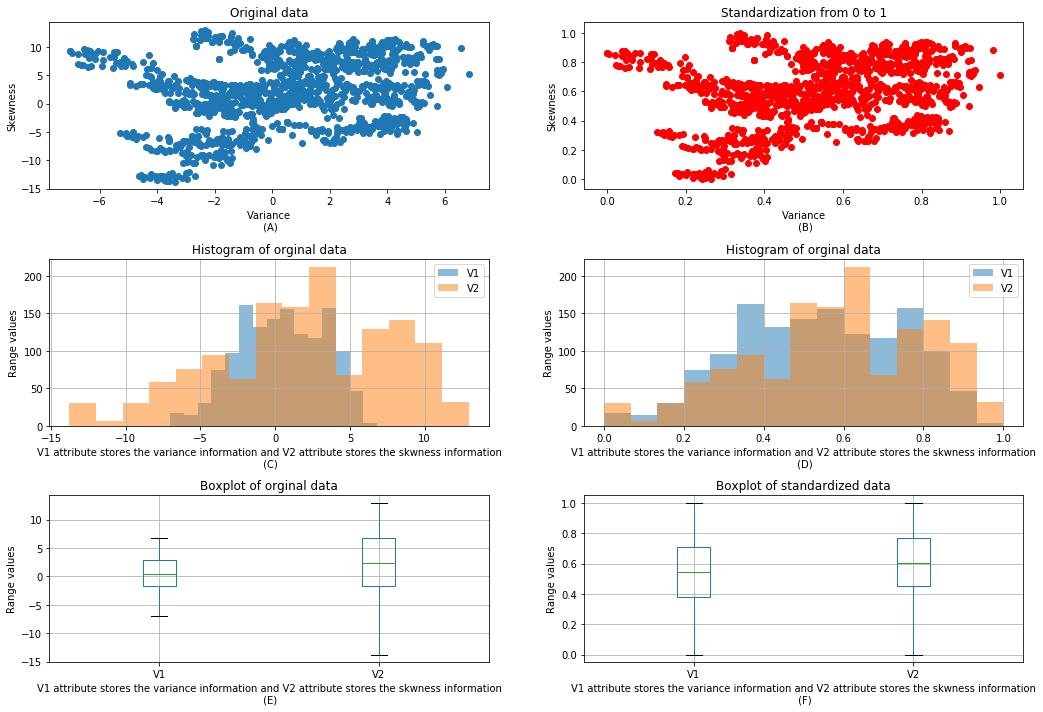

In [74]:
#plt.figure(figsize=(15,8))
plt.figure(figsize=(15,10))
#plt.tight_layout()
plt.subplot(3,2,1)
# plt.tight_layout()
plt.scatter(x= dataset['V1'], y= dataset['V2'])
plt.title('Original data')
plt.xlabel('Variance\n (A)')
plt.ylabel('Skewness')

plt.subplot(3,2,2)
plt.scatter(x= dataset_scaled['V1'], y= dataset_scaled['V2'], color='r')
plt.title('Standardization from 0 to 1')
plt.xlabel('Variance\n (B)')
plt.ylabel('Skewness')

plt.subplot(3,2,3)
# dataset.boxplot(column=['V1', 'V2'])
# dataset.hist(column=["V1","V2"], alpha=0.5,layout=(1,2))
dataset["V1"].hist(bins=15,alpha=0.5)
dataset["V2"].hist(bins=15,alpha=0.5)
plt.legend(["V1","V2"])
plt.title('Histogram of orginal data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skwness information\n (C)')
plt.ylabel('Range values')

plt.subplot(3,2,4)
# dataset.boxplot(column=['V1', 'V2'])
# dataset_scaled.hist(alpha=0.5)
dataset_scaled["V1"].hist(bins=15,alpha=0.5)
dataset_scaled["V2"].hist(bins=15,alpha=0.5)
plt.legend(["V1","V2"])
plt.title('Histogram of orginal data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skwness information\n (D)')
plt.ylabel('Range values')

plt.subplot(3,2,5)
dataset.boxplot(column=['V1', 'V2'])
plt.title('Boxplot of orginal data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skwness information\n (E)')
plt.ylabel('Range values')

plt.subplot(3,2,6)
dataset_scaled.boxplot(column=['V1', 'V2'])
plt.title('Boxplot of standardized data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skwness information\n (F)')
plt.ylabel('Range values')

plt.tight_layout()
# plt.show()


### Loading dataset

In [43]:
dataset = pd.read_csv("happyscore_income.csv")
columns = {'country','avg_income','happyScore'}
drop = list(set(dataset.columns) - columns)
dataset = dataset.drop(drop, axis=1)
dataset.head()

,country,avg_income,happyScore
0,Armenia,2096.76,4.350
1,Angola,1448.88,4.033
2,Argentina,7101.12,6.574
3,Austria,19457.04,7.200
4,Australia,19917.00,7.284


### Processing data

In [101]:
num_of_bins = 3
min_income = dataset['avg_income'].min()
max_income = dataset['avg_income'].max()
range_income = max_income-min_income
width = range_income/(num_of_bins)

bin_ranges = []
bin_ranges.append(min_income)
[bin_ranges.append((bin_ranges[i-1]+(width))) for i in range(1,num_of_bins)]
bin_ranges.append(max_income)
bin_labels = []
[bin_labels.append("B"+str(i+1)) for i in range(num_of_bins)]

print("Num. of bins: ",num_of_bins)
print("Min avg income: ",min_income)
print("Max avg income: ",max_income)
print("Range income: ",range_income)
print("Width income: ",width)
print("Bin ranges income: ",bin_ranges)
print("Bin labels income: ",bin_labels)

new_dataset = dataset
# new_dataset['Bin labels'] = pd.cut(new_dataset['avg_income'],bin_ranges,labels=bin_labels)
# new_dataset['Bin labels'] = ""
for i in range(num_of_bins):
    for index, row in new_dataset.iterrows():
        if i == 0:
            if row['avg_income'] >= bin_ranges[i] and row['avg_income'] < bin_ranges[i+1]:
#                 new_dataset['Bin labels'].iloc[index] = bin_labels[i]
                new_dataset.at[index,'Bin labels'] = bin_labels[i]
        elif i == 1:
            if row['avg_income'] >= bin_ranges[i] and row['avg_income'] < bin_ranges[i+1]:
#                 new_dataset['Bin labels'].iloc[index] = bin_labels[i]
                new_dataset.at[index,'Bin labels'] = bin_labels[i]
        else:
            if row['avg_income'] >= bin_ranges[i]:
    #             new_dataset['Bin labels'].iloc[index] = bin_labels[i]
                new_dataset.at[index,'Bin labels'] = bin_labels[i]

# new_dataset

Num. of bins:  3
Min avg income:  572.88
Max avg income:  26182.275
Range income:  25609.395
Width income:  8536.465
Bin ranges income:  [572.88, 9109.345, 17645.809999999998, 26182.275]
Bin labels income:  ['B1', 'B2', 'B3']


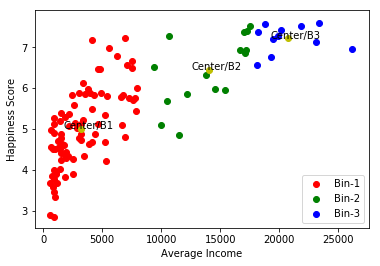

In [113]:
colors = {'B1': 'r', 'B2': 'g', 'B3': 'b'}
labels = {'B1': 'Bin-1', 'B2': 'Bin-2', 'B3': 'Bin-3'}
for l in bin_labels:
    data_plot = new_dataset[new_dataset['Bin labels'] == l]
    center_income = [data_plot['avg_income'].mean(),data_plot['happyScore'].mean()]
#         for index, row in new_dataset.iterrows():
#             plt.scatter(x=row['avg_income'], y=row['happyScore'], color=colors[row['Bin labels']], label= labels[l])
    plt.scatter(x=data_plot['avg_income'], y=data_plot['happyScore'], color=colors[l], label= labels[l])
    plt.scatter(x=center_income[0], y=center_income[1], color='y')
    plt.text(center_income[0]-1500, center_income[1], ('Center/'+l))
plt.legend()
plt.xlabel('Average Income')
plt.ylabel('Happiness Score')
plt.show()

### Plotting

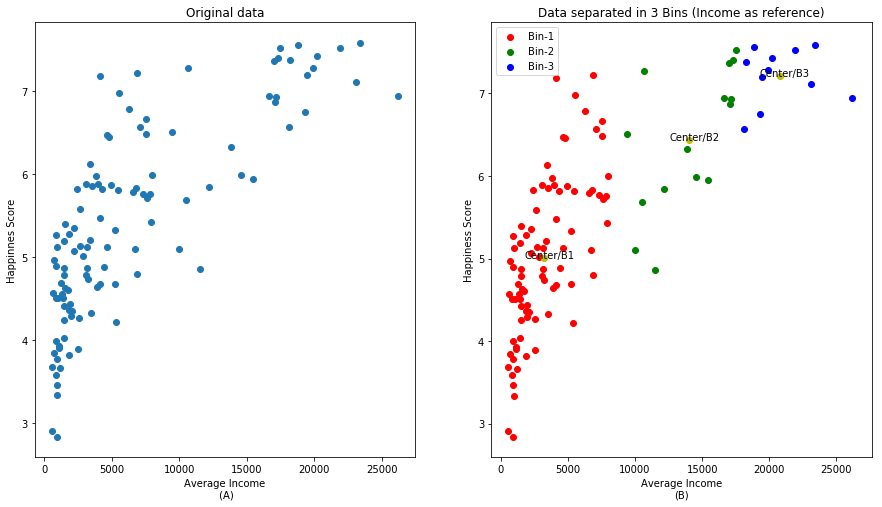

In [120]:
#fig, graph = plt.subplots(1,2)
colors = {'B1': 'r', 'B2': 'g', 'B3': 'b'}
labels = {'B1': 'Bin-1', 'B2': 'Bin-2', 'B3': 'Bin-3'}
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(x= dataset['avg_income'], y= dataset['happyScore'])
plt.title('Original data')
plt.xlabel('Average Income\n (A)')
plt.ylabel('Happinnes Score')

plt.subplot(1,2,2)
for l in bin_labels:
    data_plot = new_dataset[new_dataset['Bin labels'] == l]
    center_income = [data_plot['avg_income'].mean(),data_plot['happyScore'].mean()]
#         for index, row in new_dataset.iterrows():
#             plt.scatter(x=row['avg_income'], y=row['happyScore'], color=colors[row['Bin labels']], label= labels[l])
    plt.scatter(x=data_plot['avg_income'], y=data_plot['happyScore'], color=colors[l], label= labels[l])
    plt.scatter(x=center_income[0], y=center_income[1], color='y')
    plt.text(center_income[0]-1500, center_income[1], ('Center/'+l))
plt.title('Data separated in 3 Bins (Income as reference)')
# plt.legend(loc="lower right")
plt.legend(loc="best")
plt.xlabel('Average Income\n(B)')
plt.ylabel('Happiness Score')

#[plt.scatter(x= row['avg_income'], y= row['happyScore']) for index, row in dataset.iterrows()]
plt.show()